In [1]:
#  pip install openpyxl

In [3]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\EHF-文献-数据-文章\EHF\EHF\station')


In [4]:
df = pd.read_csv('ee-chart-2mtemp.csv',engine='python',encoding= "UTF-8")
df['system:time_start'] = pd.to_datetime(df['system:time_start'])
print(df.shape)
print(df.columns)

# print(df['Date'])


df_EHF = pd.read_csv('ee-chart.csv',engine='python',encoding= "UTF-8")
df_EHF['system:time_start'] = pd.to_datetime(df_EHF['system:time_start'])




(153, 7)
Index(['system:time_start', 'CaoShang', 'QingMuGuan', 'GanYanSuo', 'HuTouCun',
       'GanXiZhen', 'Unnamed: 6'],
      dtype='object')


In [6]:
df_station = pd.read_excel('Temp_station.xlsx', sheet_name=0)

print(df_station.shape)
print(df_station.columns)
df_station['Time'] = pd.to_timedelta(df_station['Time'].astype(str))
# print(df_station['Time'] )
df_station['Date'] = pd.to_datetime(df_station['Date'].astype(str))
# 合并日期和分钟列
# df_station['datetime'] = pd.to_datetime(df_station['Date'] + ' ' + df_station['Time'], format='%Y-%m-%d %H:%M:%S')
df_station['datetime'] = pd.to_datetime(df_station['Date'] +  df_station['Time'], format='%Y-%m-%d %H:%M:%S')

# 删除原始的日期和分钟列
# df.drop(['Date', 'Time'], axis=1, inplace=True)

# 将 datetime 列设置为索引
df_station = df_station.set_index('Date')


# 按天分组并计算平均值
daily_temperatures = df_station['Ta_3m_Avg'].resample('D').mean()
# daily_temperatures = daily_temperatures.set_index('Date')

df_station_summer = daily_temperatures.loc["2022-05-01":"2022-09-30"]

# 打印结果
print("daily_temperatures-type:",daily_temperatures.dtype)

print(df_station_summer.dtype)

print("==============================")

station_summer = pd.DataFrame(df_station_summer)

# 创建日期序列
dates = pd.date_range(start='2022-05-01', end='2022-09-30', freq='D')

# 创建空DataFrame
df_date = pd.DataFrame()

# 将日期序列添加为新列
df_date['Date'] = dates

# 将df_station_summer和新的date列按照date列进行合并
df_merged = pd.merge(station_summer, df_date, on='Date', how='outer')

# station_summer = station_summer.set_index('Date')
print("station_summer.dtypes:",station_summer.dtypes)
print(df_merged.columns)


print("==============================")


# 构建零值线条
zeros = pd.DataFrame({'value': [0] * 153})
df_zeros = pd.concat([df_date, zeros], axis=1, ignore_index=True, keys=['Date', 'value'])
df_zeros.columns = ['Date', 'value']
print("zero.dtypes:",zeros.dtypes)
print(df_zeros)




r= df['CaoShang'].corr(df_merged['Ta_3m_Avg'])


print("Pearson correlation coefficient:", r)

(52560, 5)
Index(['Date', 'Time', 'RECORD', 'Ta_3m_Avg', 'Ta_10m_Avg'], dtype='object')
daily_temperatures-type: float64
float64
station_summer.dtypes: Ta_3m_Avg    float64
dtype: object
Index(['Date', 'Ta_3m_Avg'], dtype='object')
zero.dtypes: value    int64
dtype: object
          Date  value
0   2022-05-01      0
1   2022-05-02      0
2   2022-05-03      0
3   2022-05-04      0
4   2022-05-05      0
..         ...    ...
148 2022-09-26      0
149 2022-09-27      0
150 2022-09-28      0
151 2022-09-29      0
152 2022-09-30      0

[153 rows x 2 columns]
Pearson correlation coefficient: 0.978781271052058


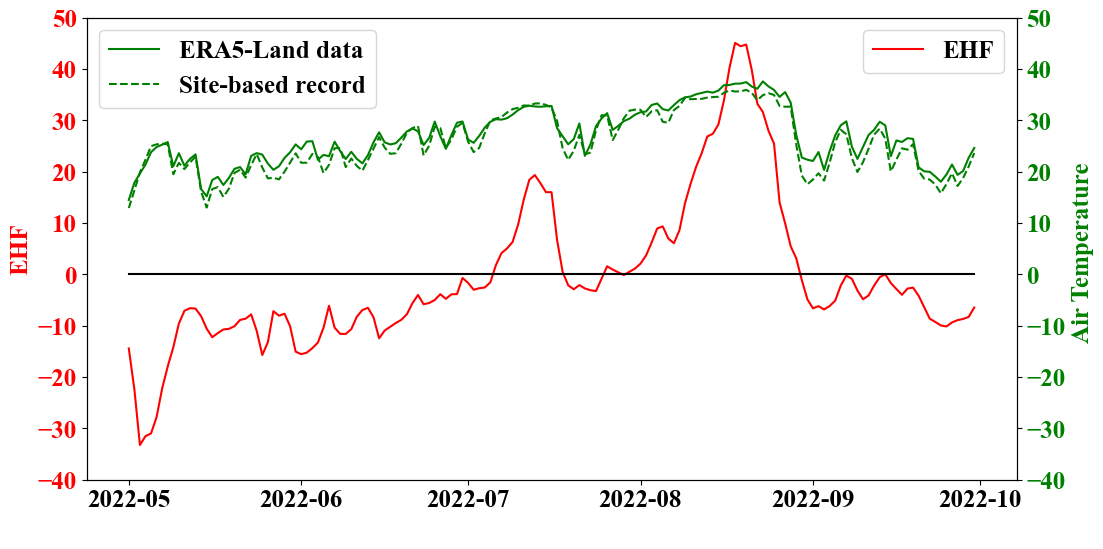

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建画布和子图对象
fig, ax1 = plt.subplots(figsize=(12,6))

# 绘制EHF曲线，设置左边Y轴
sns.lineplot(x=df_EHF['system:time_start'], y= df_EHF['CaoShang'],data=df_EHF,label="EHF", ax=ax1, color='red')
sns.lineplot(x=df_zeros['Date'], y= df_zeros['value'],data=df_zeros,label="EHF", ax=ax1, color='black')
ax1.set_ylabel('EHF', fontsize=18,color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xlabel(' ', fontsize=18,color='black')
# 创建第二个坐标轴，绘制温度曲线，设置右边Y轴
ax2 = ax1.twinx()
sns.lineplot(x=df['system:time_start'], y= df['CaoShang'],data=df,label="ERA5-Land data",ax=ax2, color='green',linestyle='solid')
sns.lineplot(x=df_merged['Date'],y= df_merged['Ta_3m_Avg'],data=df_merged,label="Site-based record",ax=ax2, color='green',linestyle='dashed')

ax2.set_ylabel('Air Temperature ',  fontsize=18,color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 设置坐标轴范围
ax1.set_ylim([-40, 50])  # 左边Y轴对应EHF的范围
ax2.set_ylim([-40, 50])  # 右边Y轴对应温度的范围
# ax2.set_ylim([0, 40])  # 右边Y轴对应温度的范围

# 设置图例
ax1.legend(['EHF'], loc='upper right')
# # ax2.legend(['Temperature'], loc='upper right')
ax2.legend( loc='upper left')
# ax3.legend( loc='upper right')

# 设置横坐标标签旋转角度，避免重叠
plt.xticks(rotation=45, ha='right')

# 添加标题
# plt.title('EHF and Temperature Changes from May 1 to September 30, 2022', fontsize=16)

# 显示图形



'''
HWA: 45.09394799476538;
HWD: 31;
HWF: 47;
HWM: 10.404891698137329;
HWN: 3
'''
plt.savefig('06git EHF temp for Caoshang station-renew label.png', dpi=300,facecolor="none", transparent=True)
plt.show()